In [ ]:
Projet4

NETTOYAGE DES DONNEES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
import scipy.stats as st
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
custom = pd.read_csv(r'/Users/Philippe/Documents/python/scripts/P4/customers.csv')
prod = pd.read_csv(r'/Users/Philippe/Documents/python/scripts/P4/products.csv')
transac = pd.read_csv(r'/Users/Philippe/Documents/python/scripts/P4/transactions.csv')

custom.head(5)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
prod.head(5)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [5]:
transac.head(5)

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [7]:
df1= prod.merge(transac, 'right')
df1.head()

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0.0,2021-05-12 23:26:29.885083,s_33709,c_7954
1,0_1421,19.99,0.0,2022-01-25 11:27:39.357012,s_154957,c_254
2,0_1421,19.99,0.0,2022-01-02 22:29:33.796003,s_144068,c_5770
3,0_1421,19.99,0.0,2021-03-05 17:10:40.265676,s_2187,c_1455
4,0_1421,19.99,0.0,2021-03-29 13:55:04.422637,s_13112,c_2768


In [8]:


df = pd.merge(left=prod,right=transac,how='outer',on='id_prod')

df = pd.merge(left=custom,right=df, how='outer',on='client_id')
df

,client_id,sex,birth,id_prod,price,categ,date,session_id
0,c_4410,f,1967.0,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707
1,c_4410,f,1967.0,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715
2,c_4410,f,1967.0,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707
3,c_4410,f,1967.0,1_461,12.99,1.0,2021-08-11 08:40:47.495793,s_74236
4,c_4410,f,1967.0,1_536,11.21,1.0,2022-01-18 17:05:07.468131,s_151740
...,...,...,...,...,...,...,...,...
337054,NaN,NaN,NaN,0_525,2.99,0.0,NaN,NaN
337055,NaN,NaN,NaN,2_86,132.36,2.0,NaN,NaN
337056,NaN,NaN,NaN,0_299,22.99,0.0,NaN,NaN
337057,NaN,NaN,NaN,0_510,23.66,0.0,NaN,NaN


In [9]:
df.columns = ['custom_id', 'custom_sex', 'custom_birth', 'prod_id', 'prod_price', 'prod_cat', 'transac_date', 'transac_sess_id']

In [10]:
df

,custom_id,custom_sex,custom_birth,prod_id,prod_price,prod_cat,transac_date,transac_sess_id
0,c_4410,f,1967.0,1_385,25.99,1.0,2021-03-22 01:40:22.782925,s_9707
1,c_4410,f,1967.0,0_1110,4.71,0.0,2021-11-04 16:28:30.169021,s_114715
2,c_4410,f,1967.0,0_1111,19.99,0.0,2021-03-22 01:27:49.480137,s_9707
3,c_4410,f,1967.0,1_461,12.99,1.0,2021-08-11 08:40:47.495793,s_74236
4,c_4410,f,1967.0,1_536,11.21,1.0,2022-01-18 17:05:07.468131,s_151740
...,...,...,...,...,...,...,...,...
337054,NaN,NaN,NaN,0_525,2.99,0.0,NaN,NaN
337055,NaN,NaN,NaN,2_86,132.36,2.0,NaN,NaN
337056,NaN,NaN,NaN,0_299,22.99,0.0,NaN,NaN
337057,NaN,NaN,NaN,0_510,23.66,0.0,NaN,NaN


In [11]:
df_na = df.loc[df.isnull().any(axis=1)]

In [14]:
prod_invendus_id = df_na.loc[df.custom_id.isnull(), 'prod_id'].unique()

In [15]:
custom_ss_achat_id = df_na.loc[df.prod_id.isnull(), 'custom_id'].unique()

Nettoyage des datas

In [13]:
df['data_info'] = np.nan

In [16]:
df = df.loc[~(df.custom_id.notnull() & (df.custom_id.str.contains('ct')))]

In [17]:
test = df[['prod_id', 'prod_cat']].copy()
test['equal'] = test['prod_id'].str[0] == test['prod_cat'].astype(str).str[0]

In [18]:
test[test['prod_id'].notnull()& test['prod_cat'].notnull()].equal.all()

True

In [19]:


cat = 0
df.loc[df.prod_id=='0_2245', 'prod_cat'] = cat

c:\users\philippe\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
cat1_price_mean = df.loc[df.prod_cat == cat, 'prod_price'].mean()
df.loc[df.prod_id=='0_2245', 'prod_price'] = cat1_price_mean

In [22]:
df.loc[df.prod_id=='0_2245', 'data_info'] = 'product_imputation'

In [23]:
df.loc[df.prod_id=='0_2245', ['prod_id', 'prod_cat', 'prod_price']].drop_duplicates()

,prod_id,prod_cat,prod_price
2678,0_2245,0.0,10.647072


In [24]:
def datadate(value):
    if pd.isnull(value):
        return value
    else:
        return datetime.strptime(value, '%Y-%m-%d %H:%M:%S.%f')

In [25]:
df['transac_date'] = df['transac_date'].apply(datadate)

<ipython-input-25-f8327082639f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transac_date'] = df['transac_date'].apply(toDate)


In [26]:
df['prod_cat'] = df['prod_cat'].fillna(-1)
df['prod_cat'] = df['prod_cat'].apply(lambda x: str(int(x)))
df['prod_cat'] = df['prod_cat'].replace('-1', np.nan)

<ipython-input-26-1edc2f3c23a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prod_cat'] = df['prod_cat'].fillna(-1)
<ipython-input-26-1edc2f3c23a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prod_cat'] = df['prod_cat'].apply(lambda x: str(int(x)))
<ipython-input-26-1edc2f3c23a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [27]:
df['transac_acheteur_age'] = df['transac_date'].dt.year - df['custom_birth']

<ipython-input-27-267d76c84ce7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transac_acheteur_age'] = df['transac_date'].dt.year - df['custom_birth']


In [28]:
df

,custom_id,custom_sex,custom_birth,prod_id,prod_price,prod_cat,transac_date,transac_sess_id,p_price,data_info,transac_acheteur_age
0,c_4410,f,1967.0,1_385,25.99,1,2021-03-22 01:40:22.782925,s_9707,NaN,NaN,54.0
1,c_4410,f,1967.0,0_1110,4.71,0,2021-11-04 16:28:30.169021,s_114715,NaN,NaN,54.0
2,c_4410,f,1967.0,0_1111,19.99,0,2021-03-22 01:27:49.480137,s_9707,NaN,NaN,54.0
3,c_4410,f,1967.0,1_461,12.99,1,2021-08-11 08:40:47.495793,s_74236,NaN,NaN,54.0
4,c_4410,f,1967.0,1_536,11.21,1,2022-01-18 17:05:07.468131,s_151740,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...
337054,NaN,NaN,NaN,0_525,2.99,0,NaT,NaN,NaN,NaN,NaN
337055,NaN,NaN,NaN,2_86,132.36,2,NaT,NaN,NaN,NaN,NaN
337056,NaN,NaN,NaN,0_299,22.99,0,NaT,NaN,NaN,NaN,NaN
337057,NaN,NaN,NaN,0_510,23.66,0,NaT,NaN,NaN,NaN,NaN


In [30]:
def split_age(age):
    tranches = [
        {'bornes': (0,30), 'label': '30-'},
        {'bornes': (31,50), 'label': '31-50'},
        {'bornes': (51,70), 'label': '51-70'},
        {'bornes': (71,120),'label': '71+'}
    ]
    for t in tranches:
        if t['bornes'][0] <= age <= t['bornes'][1]:
            return t['label']

In [31]:
df['transac_acheteur_age_range'] = df['transac_acheteur_age'].apply(split_age)

<ipython-input-31-a3a566fa2682>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transac_acheteur_age_range'] = df['transac_acheteur_age'].apply(split_age)


In [32]:
annee = 2022
df['custom_age']  = annee - df['custom_birth']

<ipython-input-32-f1e0dd66bda7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['custom_age']  = annee - df['custom_birth']


In [33]:
df['custom_age_range'] = df['custom_age'].apply(split_age)

<ipython-input-33-0ec315efb45f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['custom_age_range'] = df['custom_age'].apply(split_age)


<ipython-input-34-dd28e6b0229f>:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  df[['custom_id', 'custom_age']].drop_duplicates().custom_age.plot('hist', bins=100)


[]

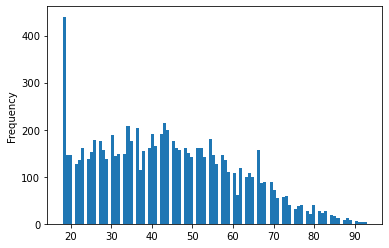

In [34]:
df[['custom_id', 'custom_age']].drop_duplicates().custom_age.plot('hist', bins=100)
plt.plot()

In [35]:
df.loc[df.custom_age == 18, 'data_info'] = 'age_out'

In [36]:

df['transac_month'] = df['transac_date'].dt.month

df['transac_month_part'] = (df['transac_date'].dt.day / (df['transac_date'].dt.days_in_month/4+1)).apply(lambda x: str(x)[0])

df['transac_weekday'] = df['transac_date'].dt.dayofweek

df['transac_hour'] = df['transac_date'].dt.hour

<ipython-input-36-5ffaffac84c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transac_month'] = df['transac_date'].dt.month
<ipython-input-36-5ffaffac84c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transac_month_part'] = (df['transac_date'].dt.day / (df['transac_date'].dt.days_in_month/4+1)).apply(lambda x: str(x)[0])
<ipython-input-36-5ffaffac84c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [37]:
def split_price(price):
    tranches = [
        {'bornes': (0,4),  'label': 'very_cheap 3-'},
        {'bornes': (4,10), 'label': 'cheap 4-9'},
        {'bornes': (10,20), 'label': 'medium 10-19'},
        {'bornes': (20,80), 'label': 'expensive 20-79'},
        {'bornes': (80,500), 'label': 'very_expansive 80+'}
    ]
    for t in tranches:
        if t['bornes'][0] <= price < t['bornes'][1]:
            return t['label']

In [38]:
df['prod_price_range'] = df['prod_price'].apply(split_price)

<ipython-input-38-a149273ddd18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prod_price_range'] = df['prod_price'].apply(split_price)


In [40]:
df = df[[
    'custom_id',
    'custom_sex',
    'custom_birth',
    'custom_age',
    'custom_age_range',
    
    'prod_id',
    'prod_cat',
    'prod_price',
    'prod_price_range',
    
    'transac_sess_id',
    'transac_acheteur_age',
    'transac_acheteur_age_range',
    
    'transac_date',
    'transac_hour',
    'transac_weekday',
    'transac_month_part',
    'transac_month',
    
    'data_info'
]]

In [41]:
df

,custom_id,custom_sex,custom_birth,custom_age,custom_age_range,prod_id,prod_cat,prod_price,prod_price_range,transac_sess_id,transac_acheteur_age,transac_acheteur_age_range,transac_date,transac_hour,transac_weekday,transac_month_part,transac_month,data_info
0,c_4410,f,1967.0,55.0,51-70,1_385,1,25.99,expensive 20-79,s_9707,54.0,51-70,2021-03-22 01:40:22.782925,1.0,0.0,2,3.0,NaN
1,c_4410,f,1967.0,55.0,51-70,0_1110,0,4.71,cheap 4-9,s_114715,54.0,51-70,2021-11-04 16:28:30.169021,16.0,3.0,0,11.0,NaN
2,c_4410,f,1967.0,55.0,51-70,0_1111,0,19.99,medium 10-19,s_9707,54.0,51-70,2021-03-22 01:27:49.480137,1.0,0.0,2,3.0,NaN
3,c_4410,f,1967.0,55.0,51-70,1_461,1,12.99,medium 10-19,s_74236,54.0,51-70,2021-08-11 08:40:47.495793,8.0,2.0,1,8.0,NaN
4,c_4410,f,1967.0,55.0,51-70,1_536,1,11.21,medium 10-19,s_151740,55.0,51-70,2022-01-18 17:05:07.468131,17.0,1.0,2,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337054,NaN,NaN,NaN,NaN,None,0_525,0,2.99,very_cheap 3-,NaN,NaN,None,NaT,NaN,NaN,n,NaN,NaN
337055,NaN,NaN,NaN,NaN,None,2_86,2,132.36,very_expansive 80+,NaN,NaN,None,NaT,NaN,NaN,n,NaN,NaN
337056,NaN,NaN,NaN,NaN,None,0_299,0,22.99,expensive 20-79,NaN,NaN,None,NaT,NaN,NaN,n,NaN,NaN
337057,NaN,NaN,NaN,NaN,None,0_510,0,23.66,expensive 20-79,NaN,NaN,None,NaT,NaN,NaN,n,NaN,NaN


In [56]:
products_unsold = df.loc[df['prod_id'].isin(prod_invendus_id), ['prod_id', 'prod_cat', 'prod_price', 'prod_price_range']]

In [57]:
customs_no_purchase = df.loc[df['custom_id'].isin(custom_ss_achat_id), ['custom_id', 'custom_sex', 'custom_birth', 'custom_age', 'custom_age_range']]

In [61]:
transacdata = df.dropna(subset=['custom_id', 'custom_sex', 'custom_birth', 'custom_age', 'custom_age_range', 'prod_id', 'prod_cat',
       'prod_price', 'prod_price_range', 'transac_sess_id', 'transac_acheteur_age',
       'transac_acheteur_age_range', 'transac_date', 'transac_hour', 'transac_weekday', 'transac_month_part',
       'transac_month'])

In [62]:
products_unsold.to_csv(r'C:/Users/Philippe/Documents/python/scripts/P4/produits_invendus.csv', index=False)
customs_no_purchase.to_csv(r'C:/Users/Philippe/Documents/python/scripts/P4/clients_sans_achat.csv', index=False)
transacdata.to_csv(r'C:/Users/Philippe/Documents/python/scripts/P4/transactionss.csv', index=False)

In [63]:
transacdata.head()

,custom_id,custom_sex,custom_birth,custom_age,custom_age_range,prod_id,prod_cat,prod_price,prod_price_range,transac_sess_id,transac_acheteur_age,transac_acheteur_age_range,transac_date,transac_hour,transac_weekday,transac_month_part,transac_month,data_info
0,c_4410,f,1967.0,55.0,51-70,1_385,1,25.99,expensive 20-79,s_9707,54.0,51-70,2021-03-22 01:40:22.782925,1.0,0.0,2,3.0,NaN
1,c_4410,f,1967.0,55.0,51-70,0_1110,0,4.71,cheap 4-9,s_114715,54.0,51-70,2021-11-04 16:28:30.169021,16.0,3.0,0,11.0,NaN
2,c_4410,f,1967.0,55.0,51-70,0_1111,0,19.99,medium 10-19,s_9707,54.0,51-70,2021-03-22 01:27:49.480137,1.0,0.0,2,3.0,NaN
3,c_4410,f,1967.0,55.0,51-70,1_461,1,12.99,medium 10-19,s_74236,54.0,51-70,2021-08-11 08:40:47.495793,8.0,2.0,1,8.0,NaN
4,c_4410,f,1967.0,55.0,51-70,1_536,1,11.21,medium 10-19,s_151740,55.0,51-70,2022-01-18 17:05:07.468131,17.0,1.0,2,1.0,NaN
